# nzip the dataset

In [ ]:
!unzip ""

In [5]:
# ! pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np




In [ ]:
dataset  = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/Potato Diseases data set/PlantVillage",
    shuffle = True,
    image_size = (256,256),
    batch_size = 32


 )

Found 2152 files belonging to 3 classes.


In [ ]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
len(dataset)

68

# size of image

In [ ]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch.shape)
  # print(image_batch[0].numpy())

(32, 256, 256, 3)


In [ ]:
for image_size,label in dataset.take(1):
  print(image_size)

tf.Tensor(
[[[[207. 205. 219.]
   [202. 200. 214.]
   [198. 196. 210.]
   ...
   [178. 179. 197.]
   [173. 174. 192.]
   [174. 175. 193.]]

  [[200. 198. 212.]
   [196. 194. 208.]
   [194. 192. 206.]
   ...
   [173. 174. 192.]
   [173. 174. 192.]
   [176. 177. 195.]]

  [[198. 196. 210.]
   [194. 192. 206.]
   [193. 191. 205.]
   ...
   [168. 169. 187.]
   [170. 171. 189.]
   [174. 175. 193.]]

  ...

  [[126. 124. 145.]
   [163. 161. 182.]
   [137. 135. 156.]
   ...
   [139. 136. 157.]
   [128. 125. 146.]
   [129. 126. 147.]]

  [[155. 153. 174.]
   [130. 128. 149.]
   [145. 143. 164.]
   ...
   [103. 100. 121.]
   [ 72.  69.  90.]
   [136. 133. 154.]]

  [[168. 166. 187.]
   [ 97.  95. 116.]
   [133. 131. 152.]
   ...
   [128. 125. 146.]
   [144. 141. 162.]
   [ 89.  86. 107.]]]


 [[[184. 188. 200.]
   [177. 181. 193.]
   [181. 185. 197.]
   ...
   [144. 147. 166.]
   [149. 152. 171.]
   [142. 145. 164.]]

  [[189. 193. 205.]
   [181. 185. 197.]
   [183. 187. 199.]
   ...
   [143. 1

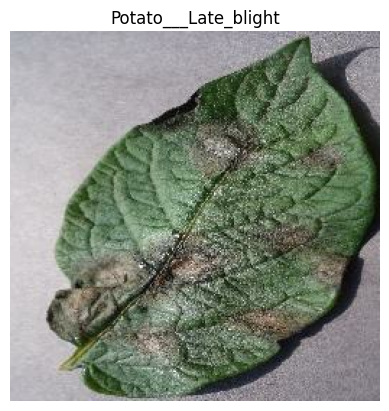

In [ ]:
for image_size,label in dataset.take(1):
 plt.imshow(image_batch[2].numpy().astype("uint8"))
 plt.title(class_name[label_batch[0]])
 plt.axis("off")

#train test model

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

train

In [ ]:
train_ds=dataset.take(54)
len(train_ds)

54

test

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)
test_ds = test_ds.take(8)
len(test_ds)

8

validation

In [ ]:
val_size = 0.1
len(dataset)*val_size
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
print(len(train_ds))
print(len(test_ds))
print(len(val_ds))

54
8
6


# shuffle

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
IMAGE_SIZE = 256
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
]
)

Data Augementation

In [ ]:
data_augmnet = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
]
)

In [1]:
model = models.sequential([
    resize_and_rescale,
    data_augmnet,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax')
])
model.build(input_shape = input_shape)

NameError: name 'models' is not defined